In [1]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import random
from sklearn.metrics import accuracy_score,classification_report

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

## The shape signifies that we have 60000 training images each of which are 28*28 pixels in resolution

In [4]:
num = random.randint(0,60000)
random_image = x_train[num]      #grabbing a random image from the training data

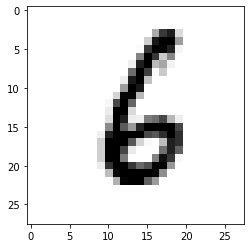

In [5]:
plt.imshow(random_image,cmap='binary')                

In [6]:
y_train[num]

6

## If we feed the training labels as they are the Neural Network will assume them to be continuous values so we will convert the labels into categorical values

In [7]:
y_cat_train = to_categorical(y_train,num_classes=10)
y_cat_test = to_categorical(y_test,num_classes=10)

In [8]:
y_cat_train[num]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

## We have a value of 1 at index 5 and 0 everywhere else indicating that the given image corresponds to 5  

In [9]:
random_image.max()

255

In [10]:
random_image.min()

0

In [11]:
x_train = x_train/255                             #Scaling the data to get better results
x_test = x_test/255

In [12]:
scaled_image = x_train[num]

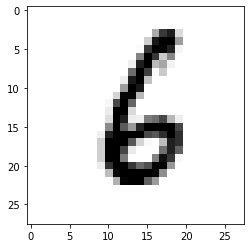

In [13]:
plt.imshow(scaled_image,cmap='binary')          #Since the ratio of the numbers are still the same we get the same result

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
#batch_size,width,height,colour_channels
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(filters = 32,kernel_size=(4,4),input_shape=(28,28,1),
                 strides=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,kernel_size=(4,4),input_shape=(28,28,1),
                 strides=(1,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_loss',patience=2) 

## This specifies that the model will stop training only if the validation loss doesn't improve for two epochs

In [19]:
model.fit(x_train,y_cat_train,epochs=30,
         validation_data = (x_test,y_cat_test),
         callbacks = [early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 134us/sample - loss: 0.1419 - accuracy: 0.9569 - val_loss: 0.0443 - val_accuracy: 0.9873
Epoch 2/30
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0333 - val_accuracy: 0.9889
Epoch 3/30
60000/60000 [==============================] - 6s 101us/sample - loss: 0.0339 - accuracy: 0.9892 - val_loss: 0.0553 - val_accuracy: 0.9817
Epoch 4/30
60000/60000 [==============================] - 6s 102us/sample - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.0325 - val_accuracy: 0.9901
Epoch 5/30
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0313 - val_accuracy: 0.9898
Epoch 6/30
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0148 - accuracy: 0.9955 - val_loss: 0.0326 - val_accuracy: 0.9917
Epoch 7/30
60000/60000 [============================

## Model Evaluation

In [20]:
losses = pd.DataFrame(model.history.history)

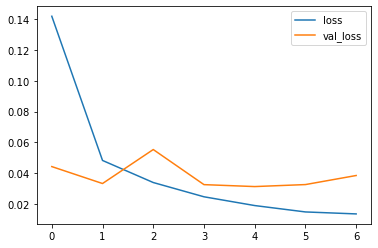

In [21]:
losses[['loss','val_loss']].plot()

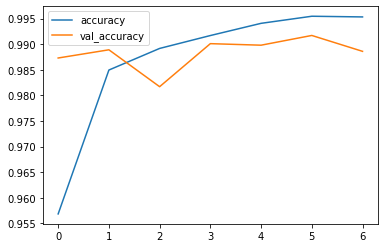

In [22]:
losses[['accuracy','val_accuracy']].plot()

In [23]:
predictions = model.predict_classes(x_test)

In [24]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.99      0.99      0.99      1133
           2       0.99      0.99      0.99      1037
           3       0.99      0.99      0.99      1003
           4       1.00      0.98      0.99      1000
           5       0.99      0.97      0.98       915
           6       0.96      1.00      0.98       925
           7       0.99      0.99      0.99      1035
           8       0.99      0.99      0.99       980
           9       0.98      0.99      0.99       996

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [25]:
print(accuracy_score(predictions,y_test))

0.9886


## The overall accuracy of our model is around 98.85%. The detailed accuracy can be seen in the classification report

## Let's recall the number we saw in the image before we trained our model.Now let's see what our model predicts it to be

In [26]:
my_num = x_train[num]

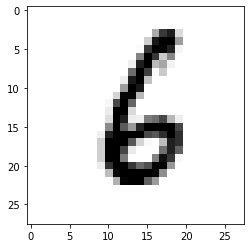

In [27]:
plt.imshow(my_num.reshape(28,28),cmap='binary')

In [28]:
model.predict_classes(my_num.reshape(1,28,28,1))

array([6], dtype=int64)